# Pymaceuticals Inc.
---

## Analysis

- ## Bar Chart:Timepoints(Number of Mice Tested) by Drug Regimen 
   - #### Top 3 Drug Regimen with maximum number of mice tested are Capomulin Ramicane and Ketapril




- ## Pie charts showing almost equal number of male and female mice test samples. 




- ## Distribution of Tumor volume for each Treatment group, Box plot
   - #### Calculating Upper Quartile(75%), lower quartile(25%) and Inter Quartile Range by treatment group and determining           potential Outliers. Values lesser than lower lower bound or greater than upper bound are potential outliers. Only           one outlier was determined: Infubinol drug regimen. 




- ## Capomulin treatment for Mouse ID l509: Line Plot
   - #### The Tumor Volume seems to be steadily increasing until the 2nd week of treatment.
   - #### There appears to be a steady decline in the Tumor Volume until mid of the following month.
   - #### After that Tumor Volume appears to be recurring and on the rise.
 
 
 
 
- ## Average tumor volume vs. Mouse Weight for the Capomulin regimen: Scatter Plot
   - #### We can observe there is a fairly positive correlation between both factors.
 
 
 
 
- ## Correlation
   - #### Correlation coefficent is 0.84 (calculated using pearsonr function in scipy)
   - #### Indicates that correlation between two factors(Weight of Mouse and Average Tumor Volume) is fairly high.
 



- ## Linear Regression
   - #### line equation calculated (using linregress function in scipy).
   - #### It appears that there is an upward trend of Tumor Volume with Mouse weight.
   - #### r-squared(or the coefficient of determination) - 0.7088568047708721
   - #### Reveals that 70% of the variability in the target variable(Tumor Volume) is explained by this model.
   
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata,study_results,how='inner',left_on='Mouse ID',right_on='Mouse ID')

# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of unique mice.
number_of_mice  = len(pd.unique(combined_mouse_study_df['Mouse ID']))
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_mouse_study_df.groupby(['Mouse ID','Timepoint'])['Timepoint'].count()
duplicates_df = pd.DataFrame(duplicates)

#renaming the count data for Timepoint column to Timepoint_cnt.
duplicates_df = duplicates_df.rename(columns={'Timepoint':'Timepoint_cnt'})

#Mouse_ID amd Timepoint having counts greater than 2 are the duplicates. 
duplicates_df = duplicates_df[duplicates_df['Timepoint_cnt'] > 1]

#reset index
duplicates_df = duplicates_df.reset_index()

#displaying the duplicates. Duplicate Mouse_ID is g989. 
duplicates_df

,Mouse ID,Timepoint,Timepoint_cnt
0,g989,0,2
1,g989,5,2
2,g989,10,2
3,g989,15,2
4,g989,20,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID, g989 from the main combined dataframe. 
timepoints = [0,5,10,15,20]
combined_mouse_study_df[(combined_mouse_study_df['Mouse ID'] == 'g989') & (combined_mouse_study_df['Timepoint']).isin(timepoints)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_IDs = list(duplicates_df['Mouse ID'].drop_duplicates())


#filtering out the duplicate Mouse IDs using '~'(not in /inversion) 
df_clean_mouse_data = combined_mouse_study_df[~combined_mouse_study_df['Mouse ID'].isin(duplicate_mouse_IDs)]
df_clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame,df_clean_mouse_data

number_of_mice_clean  = len(pd.unique(df_clean_mouse_data['Mouse ID']))
number_of_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#mean of the tumor volume:  
mean_tumor_vol = df_clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

#median of the tumor volume:
median_tumor_vol = df_clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

#Using a For loop over Durg Regimen,calculate the variance & standard deviation of Tumor Volume with numpy : 
#reference: https://github.com/pandas-dev/pandas/issues/17522

dr = []
nb_var_numpy_list = []
for dr in df_clean_mouse_data['Drug Regimen'].drop_duplicates():
    nb_var_numpy = np.var(df_clean_mouse_data[df_clean_mouse_data['Drug Regimen'] == dr]['Tumor Volume (mm3)'],ddof=0)
    nb_var_numpy_list.append(nb_var_numpy)
    
    
sd_dev_numpy_list = []    
for dr in df_clean_mouse_data['Drug Regimen'].drop_duplicates():
    sd_dev_numpy = np.std(df_clean_mouse_data[df_clean_mouse_data['Drug Regimen'] == dr]['Tumor Volume (mm3)'],ddof=0)
    sd_dev_numpy_list.append(sd_dev_numpy)
    
    
#SEM of the tumor volume using pandas sem function:
SEM_tumor_vol = df_clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

 # Assemble the resulting series into a single summary DataFrame.
summary_by_regimen_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                               "Median Tumor Volume": median_tumor_vol,
                               "Tumor Volume Variance": nb_var_numpy_list,
                               "Tumor Volume Std. Dev": sd_dev_numpy_list,
                               "Tumor Volume Std. Err.": SEM_tumor_vol})

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_by_regimen_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,23.383692,4.835669,0.329346
Ceftamin,52.591172,51.776157,24.839296,4.983904,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,60.830138,7.799368,0.603860
Naftisol,54.331565,52.509285,39.069446,6.250556,0.596466
Placebo,54.033581,52.288934,59.122106,7.689090,0.581331
Propriva,52.320930,50.446266,48.266689,6.947423,0.544332
Ramicane,40.216745,40.673236,68.188930,8.257659,0.320955
Stelasyn,54.233149,52.431737,43.555716,6.599675,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line.
grouped_summary_stats_df = df_clean_mouse_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean',
                                                                                                   'median',
                                                                                                   'var',
                                                                                                   'std',
                                                                                                   'sem']})

grouped_summary_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#For data reference to the main clean dataframe for calculations in the following steps
df_clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Text(0, 0.5, 'Number of Mice Tested')

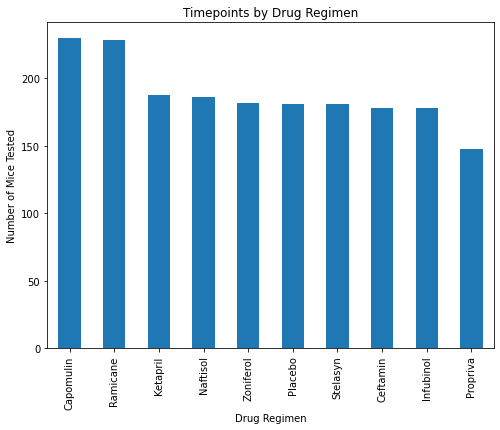

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number_timepoints = df_clean_mouse_data.groupby('Drug Regimen')['Timepoint'].count()
number_timepoints_df = pd.DataFrame(number_timepoints).sort_values('Timepoint',ascending=False)

# Set a title for the chart
data_plot = number_timepoints_df.plot(kind="bar",title ="Timepoints by Drug Regimen", figsize=(8,6),legend=False)

data_plot.set_ylabel("Number of Mice Tested")


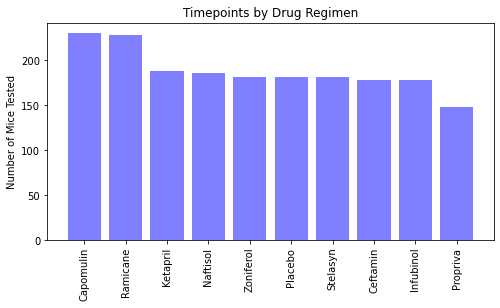

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

number_timepoints_df_final = number_timepoints_df.reset_index()

plt.figure(figsize=(8,4))
data_pyplot = plt.bar(number_timepoints_df_final['Drug Regimen'],number_timepoints_df_final['Timepoint'],color='b',alpha=0.5,align="center")

plt.xticks(rotation="vertical")

plt.title("Timepoints by Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

In [12]:

df_clean_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


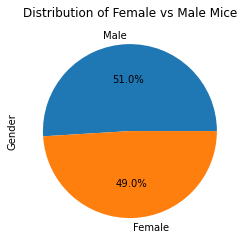

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = list(df_clean_mouse_data['Sex'].drop_duplicates())

mice_gender_pie = df_clean_mouse_data.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False)

mice_gender_pie = pd.DataFrame(mice_gender_pie)

mice_gender_pie = mice_gender_pie.rename(columns={'Mouse ID':'Gender'})

mice_gender_pie.plot(kind='pie', y = 'Gender', title="Distribution of Female vs Male Mice", legend = False, autopct="%1.1f%%")                                                                


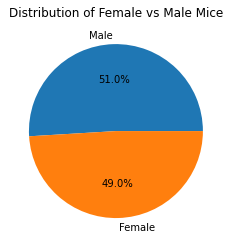

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = list(df_clean_mouse_data['Sex'].drop_duplicates())

mice_gender_pie = df_clean_mouse_data.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False)

mice_gender_pie = pd.DataFrame(mice_gender_pie)

mice_gender_pie = mice_gender_pie.rename(columns={'Mouse ID':'Gender_Cnt'})

plt.title("Distribution of Female vs Male Mice")
mice_gender_pyplot = plt.pie(mice_gender_pie['Gender_Cnt'], labels =mice_gender_pie.index, autopct="%1.1f%%") 
plt.show()



In [15]:
df_clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

gr_timepoints_df = df_clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
gr_timepoints_df = pd.DataFrame(gr_timepoints_df).rename(columns={'Timepoint':'Last Timepoint'})

gr_timepoints_df



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

combined_gr_timepoints_df = pd.merge(df_clean_mouse_data,gr_timepoints_df,how='inner',left_on='Mouse ID',right_index=True)
combined_gr_timepoints_df

tumor_vol_last_timepoint_df = combined_gr_timepoints_df[(combined_gr_timepoints_df['Timepoint'] == combined_gr_timepoints_df['Last Timepoint'])]

#Dropping the 'Last Timepoint' column since Tumor Volume for those are already fetched in the above step
tumor_vol_last_timepoint_df = tumor_vol_last_timepoint_df.drop(columns=['Last Timepoint'])

tumor_vol_last_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = tumor_vol_last_timepoint_df['Drug Regimen'].drop_duplicates()
treatments_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_plot_list = tumor_vol_last_timepoint_df['Tumor Volume (mm3)']
tumor_vol_plot_list

# Calculate the IQR and quantitatively determine if there are any potential outliers for each treatment. 
#A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group


tumor_vol_data_list = []
for treatments in treatments_list:
    quartiles = tumor_vol_last_timepoint_df[tumor_vol_last_timepoint_df['Drug Regimen'] == treatments]['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
    
    #calculating lower quartile, upper quartile and interquartile range(IQR)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #calculating lower bound and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds 
    tumor_vol = list(tumor_vol_last_timepoint_df[tumor_vol_last_timepoint_df['Drug Regimen'] == treatments]['Tumor Volume (mm3)'])
    #using list comprehension
    tumor_vol = [x for x in tumor_vol if x < lower_bound or x > upper_bound]
    
    #alternate to list comprehension, for later reference
    #tv = []
    #for x in tumor_vol:
    #    if x > upper_bound or x < lower_bound:
    #        tv.append(x)
            
    obj={'TreatmentName': treatments,'LowerQuartile':lowerq,'UpperQuartile':upperq,'InterQuartileRange(IQR)':iqr,'UpperBound':upper_bound, 'LowerBound':lower_bound,'Outliers': tumor_vol }
    tumor_vol_data_list.append(obj)
    
tumor_vol_data_df = pd.DataFrame(tumor_vol_data_list)

#Expand the list of tumor volumes to rows
tumor_vol_data_df = tumor_vol_data_df.explode('Outliers')
tumor_vol_data_df

    
  

,TreatmentName,LowerQuartile,UpperQuartile,InterQuartileRange(IQR),UpperBound,LowerBound,Outliers
0,Ramicane,31.560470,40.659006,9.098537,54.306811,17.912664,NaN
1,Capomulin,32.377357,40.159220,7.781863,51.832015,20.704562,NaN
2,Infubinol,54.048608,65.525743,11.477135,82.741446,36.832905,36.3213
3,Placebo,52.942902,68.134288,15.191386,90.921368,30.155822,NaN
4,Ceftamin,48.722078,64.299830,15.577752,87.666458,25.355450,NaN
5,Stelasyn,52.476596,69.103944,16.627349,94.044968,27.535572,NaN
6,Zoniferol,49.988302,66.794156,16.805854,92.002936,24.779522,NaN
7,Ketapril,56.720095,69.872251,13.152155,89.600484,36.991862,NaN
8,Propriva,49.119739,62.689368,13.569629,83.043811,28.765296,NaN
9,Naftisol,52.079510,69.563621,17.484111,95.789787,25.853344,NaN


In [18]:
#Dropping records with null outliers
outliers_tumor_vol_data_df = tumor_vol_data_df.dropna()
outliers_tumor_vol_data_df

,TreatmentName,LowerQuartile,UpperQuartile,InterQuartileRange(IQR),UpperBound,LowerBound,Outliers
2,Infubinol,54.048608,65.525743,11.477135,82.741446,36.832905,36.3213


In [19]:
data_for_plot = pd.DataFrame(tumor_vol_last_timepoint_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list))
data_for_plot

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[23.34359787, 28.48403281, 28.43096411, 30.485..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ketapril,"[49.78341894, 58.04656941, 62.17570465, 65.415..."
Naftisol,"[74.99776443, 73.05136339, 63.1056963, 55.1389..."
Placebo,"[70.71762058, 72.25596306, 65.81516535, 69.042..."
Propriva,"[62.19141437, 64.18322918, 61.77496268, 70.492..."
Ramicane,"[22.05012627, 29.12847181, 30.27623175, 30.564..."
Stelasyn,"[63.44068627, 60.12201052, 62.76509317, 72.555..."


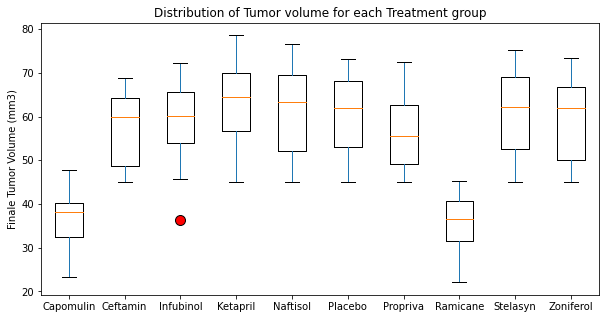

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10, 5))
outlier_point_props = {'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'}

ax1.set_title('Distribution of Tumor volume for each Treatment group')


ax1.set_xticklabels(list(data_for_plot.index))
ax1.set_ylabel('Finale Tumor Volume (mm3)')
ax1.boxplot(data_for_plot['Tumor Volume (mm3)'],whiskerprops={'color': 'tab:blue'},flierprops= outlier_point_props)
plt.show() 



In [21]:
df_clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

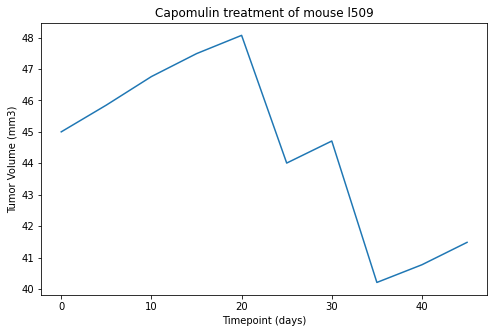

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse ID 'l509' treated with Capomulin
Capomulin_tumor_vol_df = df_clean_mouse_data[(df_clean_mouse_data['Drug Regimen'] == 'Capomulin') & (df_clean_mouse_data['Mouse ID']=='l509')] [['Timepoint','Tumor Volume (mm3)']]

Capomulin_line_plot = Capomulin_tumor_vol_df.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',title ="Capomulin treatment of mouse l509", figsize=(8,5),legend=False)
Capomulin_line_plot.set_xlabel("Timepoint (days)")
Capomulin_line_plot.set_ylabel("Tumor Volume (mm3)")


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#calculating the average Tumor volume by Mouse and converting the list to dataframe
avg_tumor_vol = df_clean_mouse_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_tumor_vol_df = pd.DataFrame(avg_tumor_vol)

#renaming the Tumor Volume calculated field for mean to Average Tumor Volume
avg_tumor_vol_df = avg_tumor_vol_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

#joining the average tumor volume dataframe to the main dataframe on Mouse ID to get the average tumor volume for each Mouse
mouse_weight_vs_avg_vol_df = pd.merge(df_clean_mouse_data,avg_tumor_vol_df,how='inner',left_on='Mouse ID',right_index=True)
mouse_weight_vs_avg_vol_df

#fetching the average tumor volume and weight for each Mouse within Capolulin regimen
capolmulin_scatter_plot_df = mouse_weight_vs_avg_vol_df[(mouse_weight_vs_avg_vol_df['Drug Regimen'] == 'Capomulin')][['Mouse ID','Weight (g)','Average Tumor Volume']] 

#removing duplicates to fetch average Tumor volume and weight for each Mouse IDs
capolmulin_scatter_plot_df =capolmulin_scatter_plot_df.drop_duplicates()

#display dataframe
capolmulin_scatter_plot_df.head()



,Mouse ID,Weight (g),Average Tumor Volume
10,s185,17,34.559143
20,x401,15,36.182040
30,m601,17,34.847470
60,f966,17,36.505973
95,u364,17,39.887495


Text(0, 0.5, 'Average Tumor Volume (mm3)')

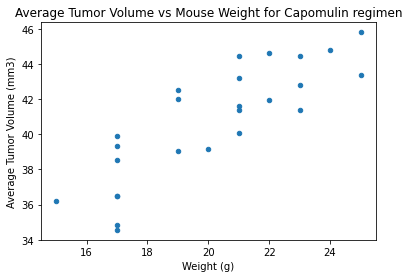

In [24]:
#scatter plot
capolmulin_scatter_plot_df.plot(kind='scatter',x='Weight (g)',y='Average Tumor Volume',marker='o')
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#plt.scatter(capolmulin_scatter_plot_df['Weight (g)'],capolmulin_scatter_plot_df['Average Tumor Volume'])


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(capolmulin_scatter_plot_df['Weight (g)'],capolmulin_scatter_plot_df['Average Tumor Volume'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


The r-squared is: 0.7088568047708721


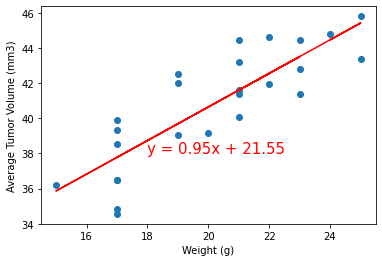

In [26]:
# for mouse weight and average tumor volume for the Capomulin regimen 

# Add the linear regression equation and line to plot

x_values = capolmulin_scatter_plot_df['Weight (g)']
y_values = capolmulin_scatter_plot_df['Average Tumor Volume']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.text(18,38,line_eq,fontsize=15,color="red")
plt.show()
